# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Using the data provided, we clean the data, transform non-numeric data, and scale and transform numeric data such that the distribution is normalized. The next step is selecting an appropriate model and hyper-parameters, separating the data set into training and testing variables and then using methods such as sequential feature selection, ridge regression, or lasso regression to find a balance between over-fitting and under-fitting the data. The methods of verifying a successful modeling process will be to determine the variables that affect used car prices, and find a good fit of the data, such that the R^2 is high, and the mean squared error is minimized in the training and testing data sets. Finally, the last step is to take the model and coefficients and gain a sense of predictive error and variance and translate all the information into a recommendation to used car dealers that is not only informative but also actionable.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

After reading the "vehicles" csv and creating a DataFrame, view the data using ".head()", ".describe()", ".info()", ".sample()" to get a sense of the data. We can use sortby() and tools to view "NA" values to get a sense of outliers and how to parse the data. We will be using some of these tools during the data preparation task. We will also be creating heatmaps and looking at variable correlation after we clean the data in the data preparation phase.

In [3]:
#import libaries used for data analysis
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [4]:
#import vehicles csv file and convert to DataFrame
vehicles = pd.read_csv('vehicles.csv')

In [5]:
# EDA
vehicles.sample(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
395721,7302165496,norfolk / hampton roads,6990,2010.0,chrysler,town and country,NaN,NaN,gas,95309.0,clean,automatic,2A4RR5D14AR493227,fwd,NaN,mini-van,white,va
327202,7309609211,salem,600,1998.0,pontiac,sunfire,salvage,NaN,gas,216790.0,rebuilt,automatic,NaN,NaN,full-size,sedan,red,or
256266,7316429949,south jersey,4900,2006.0,volkswagen,jetta,NaN,5 cylinders,gas,75447.0,clean,automatic,3VWPG71KX6M841992,fwd,NaN,sedan,grey,nj
3107,7311284446,huntsville / decatur,39590,2020.0,ford,mustang gt coupe 2d,good,8 cylinders,gas,1988.0,clean,other,1FA6P8CF9L5171928,rwd,NaN,coupe,black,al
337163,7310769819,pittsburgh,2999,2005.0,volkswagen,jetta,good,4 cylinders,gas,119288.0,clean,automatic,3VWSK69M35M032468,fwd,NaN,sedan,blue,pa
110735,7305539015,sarasota-bradenton,57000,2020.0,ford,expedition,NaN,6 cylinders,gas,1500.0,clean,automatic,NaN,4wd,full-size,SUV,white,fl
7711,7301933552,anchorage / mat-su,1700,2009.0,toyota,camry hybrid,good,4 cylinders,gas,320000.0,clean,automatic,NaN,fwd,full-size,sedan,red,ak
218881,7313732254,north mississippi,26990,2016.0,ford,f150 regular cab xl pickup,good,6 cylinders,gas,14230.0,clean,other,1FTMF1CP3GKD62143,NaN,NaN,pickup,black,ms
285799,7310651215,new hampshire,16995,2014.0,audi,allroad,excellent,NaN,gas,93000.0,clean,automatic,WA1UFAFL8EA083549,4wd,NaN,wagon,blue,nh
325034,7316759079,salem,296,2014.0,honda,accord 4dr v6 auto ex-l,NaN,6 cylinders,gas,NaN,clean,automatic,1HGCR3F82EA042416,fwd,NaN,sedan,NaN,or


In [6]:
# EDA
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
# EDA
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

This section will involve many lines of code, to look for NAs, outliers, determine columns that can be cut out, and make sure the data set is going to allow the model selected to provide good outputs. We also determine whether certain rows should be cut out or re-categorized to make the data set more informative from a categorization perspective.

This is also where we analyze the features and conduct appropriate transformation. That can include one hot encoding, ordinal encoding, and James-Stein on categorical features, and min-max scaling and normalization techniques on numerical data. Some data might not be normally distributed, leaving open the possibility for polynomial, exponential, and logarithmic transformations on feature variables.  

In [8]:
#check for NAs
vehicles.isna().sum()

# drop columns - "id" because it presents no important information
vehicles.drop(columns = 'id', axis = 1, inplace = True)

#drop column - "VIN" because no important information
vehicles.drop(columns = 'VIN', axis = 1, inplace = True)

# drop column - 'size' because most of the information is missing (NAs) and would dramatically reduce the size of the dataset and importance
# is unclear from a business / intuition perspective
vehicles.drop(columns = 'size', axis = 1, inplace = True)

# drop NAs - we do this step after cutting some columns in case the columns taken out had NA rows that would not need to be taken out
vehicles2 = vehicles.dropna(inplace = False)
vehicles2.isna().sum()

# Data cleaning
vehicles2.reset_index(inplace = True)
vehicles2.drop(columns = 'index', axis = 1, inplace = True)
vehicles2.head()


# over 2/3 of the data was dropped due to NAs, but 100k cars still quite a bit, so I think worth keeping the features we kept
# decided not to use imputers because I did not find a relevant way to do imputation that made sense to me



<ipython-input-8-48303cf50cc1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles2.drop(columns = 'index', axis = 1, inplace = True)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
1,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
2,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
3,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
4,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al


This is where we sort and clean data, looking to get rid of outliers that seem to be "bad" or "erroneous" data. Genuine outliers, we look to keep - for example, a very expensive 1965 Corvette. Filter out prices above $170,000, since the majority of those values are too high to be sensible, and some correspond to normal, not luxury, car models.

In [9]:
#sort and clean data by removing price outliers

dfsort = vehicles2.sort_values(by = 'price', ascending = False)
dfsort.head(30)

# filter out prices above 170000
vehicles2 = vehicles2[vehicles2['price'] < 170000]
dfsort2 = vehicles2.sort_values(by = 'price', ascending = False)
# filter out prices less than 500, since many of those seem bogus (some of the cars are "like new" condition)
vehicles2 = vehicles2[vehicles2['price'] > 499]
dfsort3 = vehicles2.sort_values(by = 'price', ascending = True)
dfsort3.head(30)
vehicles2.info()

#filter out the odometer data, filtering out values >499,000 and less than 100 miles
vehicles2 = vehicles2[vehicles2['odometer'] < 499000]
vehicles2 = vehicles2[vehicles2['odometer'] > 100]
dfsort4 = vehicles2.sort_values(by = 'odometer', ascending = True)


<class 'pandas.core.frame.DataFrame'>
Index: 109986 entries, 0 to 115987
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        109986 non-null  object 
 1   price         109986 non-null  int64  
 2   year          109986 non-null  float64
 3   manufacturer  109986 non-null  object 
 4   model         109986 non-null  object 
 5   condition     109986 non-null  object 
 6   cylinders     109986 non-null  object 
 7   fuel          109986 non-null  object 
 8   odometer      109986 non-null  float64
 9   title_status  109986 non-null  object 
 10  transmission  109986 non-null  object 
 11  drive         109986 non-null  object 
 12  type          109986 non-null  object 
 13  paint_color   109986 non-null  object 
 14  state         109986 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 13.4+ MB


We graph some of the numerical values, including "Price" vs "Year," experimenting with scatter plots and histograms, since the sheer quantity of data makes it hard to visualize. The price of cars appears to be logarithmically distributed, but it is unclear whether conducting a transformation on the target variable is necessary. Price vs year could be a polynomial or exponential relationship simple because of the breadth of years - price in 1960 would not be dramatically different from price in 1970 and there are confounding variables for older cars such as antique value, but for newer cars, the difference between a 2010 and 2020 model price is dramatic.

For the "odometer" feature, it is the inverse. A logarithmic transformation or simple linear transformation might be appropriate. It is also clear that some scaling mechanism for year makes sense - maybe min/max. And min/max seems appropriate for most of the numerical features.

<ipython-input-10-b095412b82b3>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


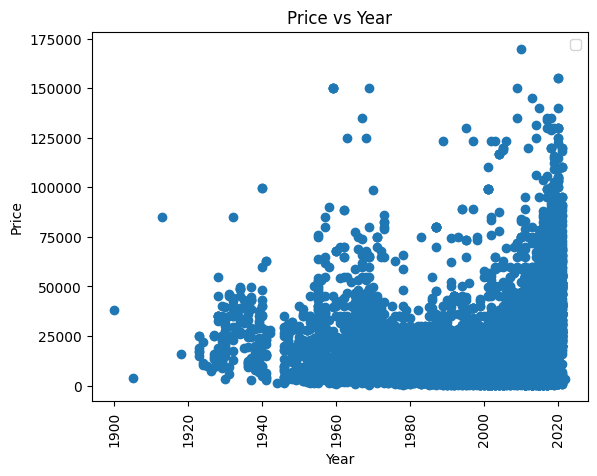

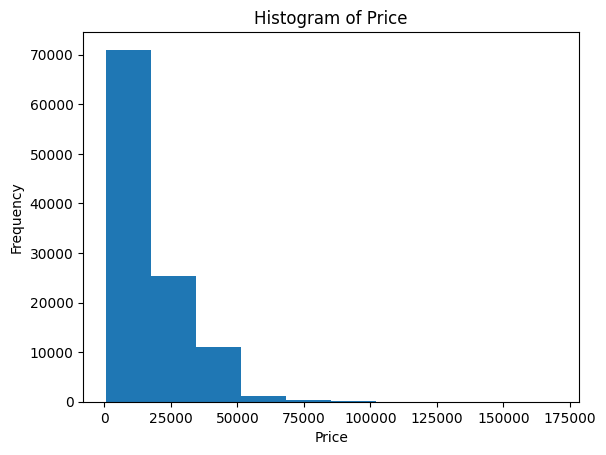

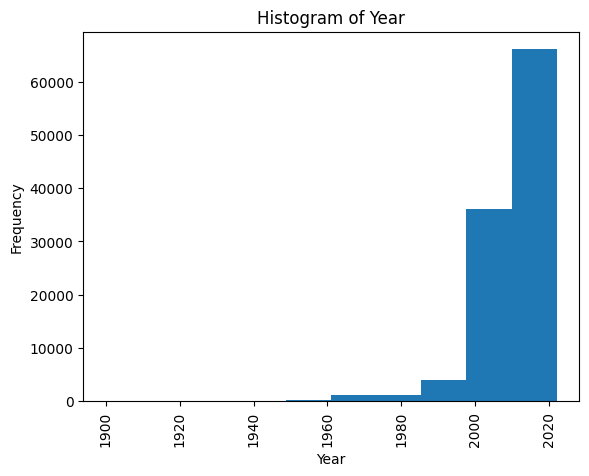

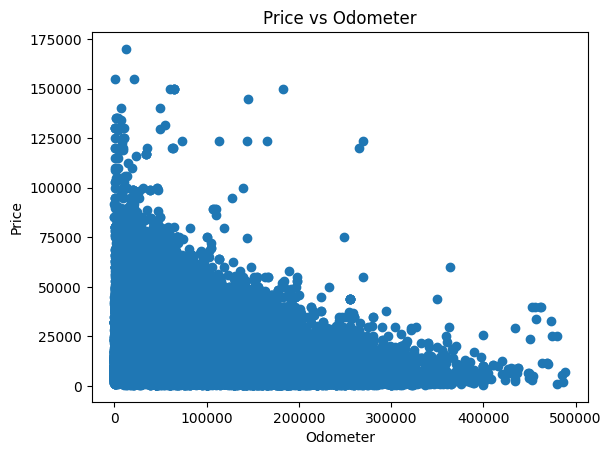

In [10]:

# eda on data in 'year' category
dfsort5 = vehicles2.sort_values(by = 'year', ascending = True)
dfsort5.head(500)

# Plot price vs Year
plt.scatter(vehicles2['year'], vehicles2['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
# label x axis
plt.xticks(rotation = 90)
# Create legend
plt.legend()
# show the plot
plt.show()

# Create a histogram of price and scale dimensions for readability
plt.hist(vehicles2['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

# Creat a histogram of year and make it readable / aesthetically pleasing
plt.hist(vehicles2['year'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')
plt.xticks(rotation = 90)
plt.show()


# Create a scatter plot of price vs odometer
plt.scatter(vehicles2['odometer'], vehicles2['price'])
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price vs Odometer')
plt.show()

Now, it is time to get into the nitty-gritty of individual rows and categories of row values. For some features, that means filtering for certain value types since a few values are much more predominant than the others, and therefore more useful in prediction. We do mappings for the tricky "model" feature, since certain car models are represented in different spellings. We also filter out certain models where the mapping is unclear and also filter out car models without many cars sold, since there is a small sample problem there. This is a continuation of the general strategy to go column by column, decided whether to cut, keep, or transform each feature, and how to clean the data within each feature.  

In [11]:
# filter for cylinders, including only 4, 6, and 8 since the other types have small quantities
vehicles2 = vehicles2[vehicles2['cylinders'].isin(['4 cylinders', '6 cylinders', '8 cylinders'])]

# filter out models with very few cars, and group models that are the same but have different labels

counts_df = vehicles2['model'].value_counts().reset_index()
counts_df.columns = ['model', 'count']
counts_df.head(150)
# apply some sensible mappings
mapping = {
   'f150': 'f-150',
   '1500': 'silverado 1500',
   '2500': 'silverado 2500',
   '3500': 'silverado 3500',
   'silverado': 'silverado 1500'
}
vehicles2['model'] = vehicles2['model'].replace(mapping)
# filter out "200" and "3" because insensible and any models with less than 100 sales due to small sample size
value_counts = vehicles2['model'].value_counts()
frequent_values = value_counts[value_counts >= 100].index
vehicles2 = vehicles2[vehicles2['model'].isin(frequent_values)]
vehicles2['model'].value_counts()
# filter out "200" and "3" from 'model' column
unwanted = ['200', '3']
vehicles2 = vehicles2[~vehicles2['model'].isin(unwanted)]
vehicles2['model'].value_counts()

,count
model,
silverado 1500,3088
f-150,2083
camry,851
accord,804
civic,773
...,...
dts,101
f150 xlt,101
crv,100


Continue going feature by feature, doing James-Stein encoding on "manufacturer", "model", "type", and "state". We do one-hot encoding for "cylinder." We drop some value types for "title_status" that suffer from small sample bias. We drop "region" since there are so many variables, the effect on car values is not as strong as for features like "model" which also have many variables, and because there is correlation with "state." However, we decide to drop the "state" variable after encoding with James-Stein, after noting the relatively low dispersion in values, meaning any signal is likely to be noisy.  All this filtering leads to a significant loss of row values, from over 400k to less than 100k. However, that is still potentially enough data, and a much cleaner data set that should lead to actionable insights. We have also lost some potentially important columns, but we use intuition to decide on certain features to cut, in order to save compute time and reduce the chance of overfitting.  

In [12]:

# do James-Stein encoding on manufacturer
categorical_columns = ['manufacturer', 'model', 'type', 'state']
# Initialize the James-Stein encoder
encoder = ce.JamesSteinEncoder(
        cols=categorical_columns
    )
# Fit and transform the data
encoded_values = encoder.fit_transform(vehicles2[categorical_columns], vehicles2['price'])

# Create a new DataFrame with the encoded values
result_df = vehicles2.copy()
for col in categorical_columns:
    result_df[f'{col}_james_stein'] = encoded_values[col]

result_df.head()
result_df.info()
# have lost a lot of data by filtering out NAs, outliers and choosing to keep "models" column which means filtering out certain "models"

# do one hot encoding on cylinders
results_ddf = pd.get_dummies(result_df, columns = ['cylinders'])
results_ddf.head()
#convert to correct dtypes
results_ddf = results_ddf.convert_dtypes()
results_ddf['cylinders_4 cylinders'] = results_ddf['cylinders_4 cylinders'].astype('int64')
results_ddf['cylinders_6 cylinders'] = results_ddf['cylinders_6 cylinders'].astype('int64')
results_ddf['cylinders_8 cylinders'] = results_ddf['cylinders_8 cylinders'].astype('int64')
results_ddf.info()
results_ddf.head()


# drop "parts only" and "missing" value for "title_status" since it's a small sample
unwanted_title = ['parts only', 'missing']
results_ddf = results_ddf[~results_ddf['title_status'].isin(unwanted_title)]
results_ddf['title_status'].value_counts()

# drop regions with less than 100 cars sold and potentially drop the entire column since it's a small sample size


results_ddf.drop(columns = 'region', axis = 1, inplace = True)
results_ddf.head()

# drop manufactuer, model, type, state since using James-Stein versions
results_ddf.drop(columns = 'manufacturer', axis = 1, inplace = True)
results_ddf.drop(columns = 'model', axis = 1, inplace = True)
results_ddf.drop(columns = 'type', axis = 1, inplace = True)
results_ddf.drop(columns = 'state', axis = 1, inplace = True)
results_ddf.head()

# EDA
results_ddf['state_james_stein'].value_counts()
results_ddf['manufacturer_james_stein'].value_counts()
results_ddf['model_james_stein'].value_counts()
results_ddf['type_james_stein'].value_counts()

# drop "state_james_stein" column
results_ddf.drop(columns = 'state_james_stein', axis = 1, inplace = True)
results_ddf.head()


<class 'pandas.core.frame.DataFrame'>
Index: 49405 entries, 0 to 115986
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    49405 non-null  object 
 1   price                     49405 non-null  int64  
 2   year                      49405 non-null  float64
 3   manufacturer              49405 non-null  object 
 4   model                     49405 non-null  object 
 5   condition                 49405 non-null  object 
 6   cylinders                 49405 non-null  object 
 7   fuel                      49405 non-null  object 
 8   odometer                  49405 non-null  float64
 9   title_status              49405 non-null  object 
 10  transmission              49405 non-null  object 
 11  drive                     49405 non-null  object 
 12  type                      49405 non-null  object 
 13  paint_color               49405 non-null  object 
 14  state     

,price,year,condition,fuel,odometer,title_status,transmission,drive,paint_color,manufacturer_james_stein,model_james_stein,type_james_stein,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders
0,15000,2013,excellent,gas,128000,clean,automatic,rwd,black,16773.722953,18547.675781,19293.729536,0,1,0
1,27990,2012,good,gas,68696,clean,other,4wd,black,20289.73163,27990.0,20426.235566,0,0,1
2,34590,2016,good,gas,29499,clean,other,4wd,silver,17770.856625,32954.8854,20426.235566,0,1,0
3,35000,2019,excellent,gas,43000,clean,automatic,4wd,grey,14632.056106,17777.207206,19293.729536,0,1,0
4,29990,2016,good,gas,17302,clean,other,4wd,red,17770.856625,28193.736934,20426.235566,0,1,0


Scale numerical values and now-numerical values thanks to James Stein, using min / max scaling. Will also consider using standardscaler() for "year" and "odometer" since there are more outlier values, but min-max makes sense for the James-Stein created variables.

Next, use ordinal encoder on "condition" and "title_status."

Use OHE on "paint color" and "drive." And cut some columns that are dominated by one value, where there is not **much** point in figuring out the story behind the other values.

Now, this seems like a hodgepodge of techniques, with techniques not necessarily grouped together. However, the approach is to go feature by feature and select the best transformations and approaches for each feature. While more sophisticated practioners might have better algorithms, this approach seems thorough and correct.

In [13]:
# scale "year", "odometer", "manufacturer_james_stein", "model_james_stein", and "type_james_stein" using min / max
results_ddf['year_scaled'] = (results_ddf['year'] - results_ddf['year'].min()) / (results_ddf['year'].max() - results_ddf['year'].min())
results_ddf['odometer_scaled'] = (results_ddf['odometer'] - results_ddf['odometer'].min()) / (results_ddf['odometer'].max() - results_ddf['odometer'].min())
results_ddf['manufacturer_james_stein_scaled'] = (results_ddf['manufacturer_james_stein'] - results_ddf['manufacturer_james_stein'].min()) / (results_ddf['manufacturer_james_stein'].max() - results_ddf['manufacturer_james_stein'].min())
results_ddf['model_james_stein_scaled'] = (results_ddf['model_james_stein'] - results_ddf['model_james_stein'].min()) / (results_ddf['model_james_stein'].max() - results_ddf['model_james_stein'].min())
results_ddf['type_james_stein_scaled'] = (results_ddf['type_james_stein'] - results_ddf['type_james_stein'].min()) / (results_ddf['type_james_stein'].max() - results_ddf['type_james_stein'].min())
results_ddf.head()
# drop "year", "odometer", "manufacturer_james_stein", "model_james_stein", and "type_james_stein"
results_ddf.drop(columns = 'year', axis = 1, inplace = True)
results_ddf.drop(columns = 'odometer', axis = 1, inplace = True)
results_ddf.drop(columns = 'manufacturer_james_stein', axis = 1, inplace = True)
results_ddf.drop(columns = 'model_james_stein', axis = 1, inplace = True)
results_ddf.drop(columns = 'type_james_stein', axis = 1, inplace = True)
results_ddf.head()

results_ddf.head()
# run ordinal encoder on "condition" and "title_status"
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
results_ddf['condition_encoded'] = ordinal_encoder.fit_transform(results_ddf[['condition']])

ordinal_encoder2 = OrdinalEncoder(categories = [['lien', 'salvage', 'rebuilt', 'clean']])
results_ddf['title_status_encoded'] = ordinal_encoder2.fit_transform(results_ddf[['title_status']])
results_ddf.head()
# drop 'condition' and 'title_status' columns
results_ddf.drop(columns = 'condition', axis = 1, inplace = True)
results_ddf.drop(columns = 'title_status', axis = 1, inplace = True)
results_ddf.head()

results_ddf['fuel'].value_counts()
# drop fuel since most cars sold are gas
results_ddf.drop(columns = 'fuel', axis = 1, inplace = True)
results_ddf.head()

results_ddf['transmission'].value_counts()
# drop transmission since most cars have "automatic" transmission
results_ddf.drop(columns = 'transmission', axis = 1, inplace = True)
results_ddf.head()

results_ddf['drive'].value_counts()
results_ddf['paint_color'].value_counts()
# one hot encoding on "paint_color" and "drive"
results_ddf = pd.get_dummies(results_ddf, columns = ['paint_color', 'drive'])
results_ddf.head()

# convert bools to int
results_ddf['drive_4wd'] = results_ddf['drive_4wd'].astype('int64')
results_ddf['drive_fwd'] = results_ddf['drive_fwd'].astype('int64')
results_ddf['drive_rwd'] = results_ddf['drive_rwd'].astype('int64')

# more bools to ints
results_ddf['paint_color_black'] = results_ddf['paint_color_black'].astype('int64')
results_ddf['paint_color_blue'] = results_ddf['paint_color_blue'].astype('int64')
results_ddf['paint_color_brown'] = results_ddf['paint_color_brown'].astype('int64')
results_ddf['paint_color_green'] = results_ddf['paint_color_green'].astype('int64')
results_ddf['paint_color_orange'] = results_ddf['paint_color_orange'].astype('int64')
results_ddf['paint_color_silver'] = results_ddf['paint_color_silver'].astype('int64')
results_ddf['paint_color_white'] = results_ddf['paint_color_white'].astype('int64')
results_ddf['paint_color_yellow'] = results_ddf['paint_color_yellow'].astype('int64')
results_ddf['paint_color_purple'] = results_ddf['paint_color_purple'].astype('int64')
results_ddf['paint_color_red'] = results_ddf['paint_color_red'].astype('int64')
results_ddf['paint_color_custom'] = results_ddf['paint_color_custom'].astype('int64')
results_ddf['paint_color_grey'] = results_ddf['paint_color_grey'].astype('int64')
results_ddf.info()



<class 'pandas.core.frame.DataFrame'>
Index: 49335 entries, 0 to 115986
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            49335 non-null  Int64  
 1   cylinders_4 cylinders            49335 non-null  int64  
 2   cylinders_6 cylinders            49335 non-null  int64  
 3   cylinders_8 cylinders            49335 non-null  int64  
 4   year_scaled                      49335 non-null  Float64
 5   odometer_scaled                  49335 non-null  Float64
 6   manufacturer_james_stein_scaled  49335 non-null  Float64
 7   model_james_stein_scaled         49335 non-null  Float64
 8   type_james_stein_scaled          49335 non-null  Float64
 9   condition_encoded                49335 non-null  float64
 10  title_status_encoded             49335 non-null  float64
 11  paint_color_black                49335 non-null  int64  
 12  paint_color_blue      

Correlation matrix below suggests that price might be correlated with
a) # of cylinders (8 has 0.34 corr, 4 has -0.37 corr, 6 has only 0.03 corr)
b) years_scaled: 0.49 corr
c) odometer_scaled: -0.29 corr
d) manufacturer_james_stein_scaled: 0.38 corr
e) model_james_stein_scaled: 0.72 corr
f) type_james_stein_scaled: 0.5 corr
g) paint colors have low corr values in absolute terms
h) 4wd (0.31 corr) and fwd (-0.41 corr) drive seem important

In [14]:
corr = results_ddf.corr()
corr

,price,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,year_scaled,odometer_scaled,manufacturer_james_stein_scaled,model_james_stein_scaled,type_james_stein_scaled,condition_encoded,...,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,drive_4wd,drive_fwd,drive_rwd
price,1.000000,-0.372622,0.031561,0.343856,0.493768,-0.604980,0.376712,0.722602,0.509720,0.052566,...,-0.096102,0.022342,-0.030083,0.069497,-0.090465,0.120857,0.028398,0.309064,-0.425990,0.128007
cylinders_4 cylinders,-0.372622,1.000000,-0.521039,-0.472156,0.074580,0.028899,-0.453599,-0.507799,-0.538977,0.130153,...,0.103091,-0.007871,0.000247,-0.054730,0.078963,-0.088713,-0.030968,-0.328272,0.542963,-0.244948
cylinders_6 cylinders,0.031561,-0.521039,1.000000,-0.506390,0.057447,-0.008123,0.081679,0.071926,0.009813,-0.030213,...,-0.003993,-0.008822,0.013168,-0.026975,0.039402,0.006252,-0.007741,0.126026,-0.077189,-0.064037
cylinders_8 cylinders,0.343856,-0.472156,-0.506390,1.000000,-0.134677,-0.020807,0.373904,0.438734,0.534381,-0.100287,...,-0.100026,0.017063,-0.013849,0.083152,-0.120469,0.083168,0.039282,0.201488,-0.468824,0.313602
year_scaled,0.493768,0.074580,0.057447,-0.134677,1.000000,-0.459682,0.073676,0.256014,0.003698,0.167076,...,0.016893,-0.023724,-0.030959,-0.037058,0.004648,0.065068,-0.041325,0.099219,0.028191,-0.157550
odometer_scaled,-0.604980,0.028899,-0.008123,-0.020807,-0.459682,1.000000,-0.123524,-0.406195,-0.146348,-0.127960,...,0.042283,-0.023174,0.020590,-0.065602,0.035550,-0.012922,-0.032862,0.016166,0.085657,-0.123294
manufacturer_james_stein_scaled,0.376712,-0.453599,0.081679,0.373904,0.073676,-0.123524,1.000000,0.484196,0.476966,-0.082043,...,-0.101616,0.014631,-0.012726,0.071809,-0.089102,0.092423,0.023736,0.276568,-0.395596,0.131884
model_james_stein_scaled,0.722602,-0.507799,0.071926,0.438734,0.256014,-0.406195,0.484196,1.000000,0.672803,-0.244828,...,-0.162123,0.013217,-0.022350,0.118794,-0.104085,0.109961,0.055512,0.319474,-0.544777,0.258092
type_james_stein_scaled,0.509720,-0.538977,0.009813,0.534381,0.003698,-0.146348,0.476966,0.672803,1.000000,-0.150954,...,-0.126324,0.024031,-0.015819,0.123341,-0.113303,0.117100,0.054893,0.388964,-0.640284,0.286545
condition_encoded,0.052566,0.130153,-0.030213,-0.100287,0.167076,-0.127960,-0.082043,-0.244828,-0.150954,1.000000,...,0.068018,0.007410,-0.015775,-0.033060,0.022817,0.010703,-0.008924,-0.045520,0.108591,-0.074070


Create more graphs and visualizations of the data.

Text(0, 0.5, 'Count')

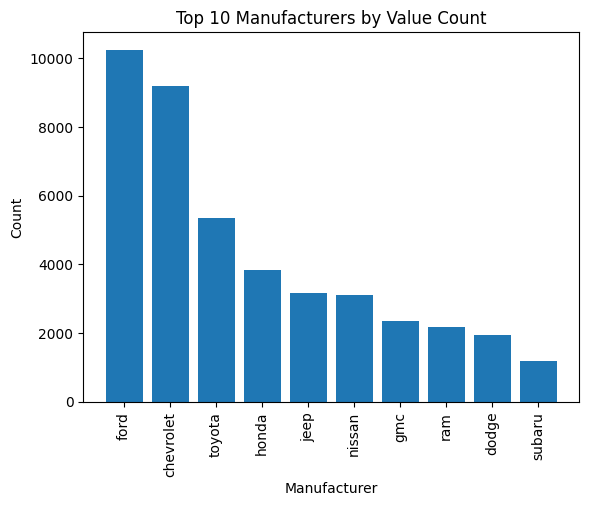

In [15]:
vehicles2.head()
# Create a histogram for top 10 manufacturers by value count and label it and fit labels legibly

top_10_manufacturers = vehicles2['manufacturer'].value_counts().head(10)
plt.bar(top_10_manufacturers.index, top_10_manufacturers.values)
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Top 10 Manufacturers by Value Count')
plt.xticks(rotation=90)
plt.ylabel('Count')


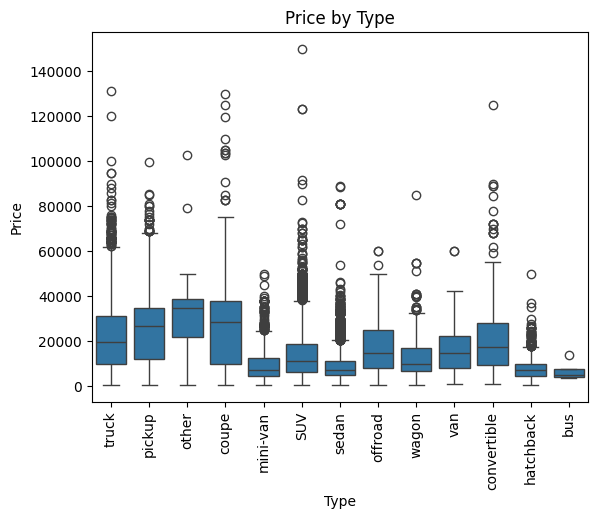

In [16]:
# Plot in seaborn vehicle price by "type" and make labels legible
sns.boxplot(x = 'type', y = 'price', data = vehicles2)
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Price by Type')
plt.xticks(rotation = 90)
plt.show()

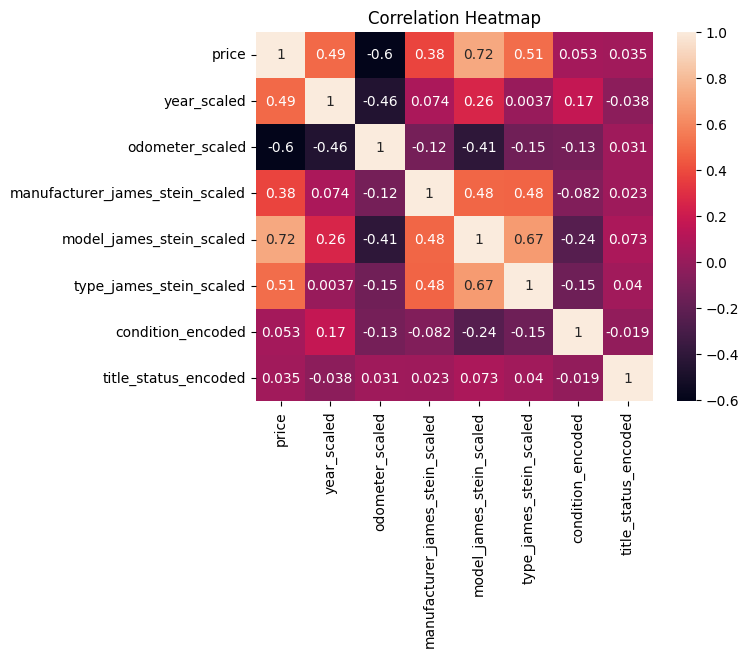

In [17]:
# create a correlation heatmap in seaborn
heatcols = ['price', 'year_scaled', 'odometer_scaled', 'manufacturer_james_stein_scaled', 'model_james_stein_scaled', 'type_james_stein_scaled', 'condition_encoded', 'title_status_encoded']
corr3 = results_ddf[heatcols].corr()
sns.heatmap(corr3, annot = True)
# create a title
plt.title('Correlation Heatmap')
# show the plot
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Use "train_test_split" to divide the data into a training and testing dataset. Use SequentialFeatureSelector to pick the most relevant features, using linear regression. Then, train the model using selected features. Calculate scoring metrics, including R^2 and mean_squared_error on the train and test data. The train and test MSE are similar, suggesting it's not overfit. More specifically, the train MSE is 43,094,556 and the test MSE is 49,001,044. The R^2 of 72% is pretty good, but perhaps can be improved on a further iteration. The RMSE has more intuitive value than the MSE, since it is in the same units as the target variable. The RMSE for the testing dataset is 7k. Intuitively, this seems reasonable but on the slightly higher side. I would expect a really good model to have an RMSE closer to $5,000, based on my knowledge of the used car market.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = results_ddf.drop(columns = 'price', axis = 1)
y = results_ddf['price']
# cross - validation: focus on holdout cross-validation (train / test / split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)


# use SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
model = LinearRegression()
sfs = SequentialFeatureSelector(estimator = model, n_features_to_select = 10, direction = 'forward')
sfs.fit(X_train, y_train)

# get the selected features
selected_features = X_train.columns[sfs.get_support()]
print(selected_features)

# Transform the training and test sets to include only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Train the model using only the selected features
model.fit(X_train_selected, y_train)

#calculate mse on the training set
y_train_pred = model.predict(X_train_selected)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on training set: {mse_train}")

# Evaluate the model on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model via scoring

r2 = model.score(X_test_selected, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"R^2 Score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Index(['cylinders_6 cylinders', 'cylinders_8 cylinders', 'year_scaled',
       'odometer_scaled', 'model_james_stein_scaled',
       'type_james_stein_scaled', 'condition_encoded', 'title_status_encoded',
       'paint_color_white', 'drive_4wd'],
      dtype='object')
MSE on training set: 43094556.594469145
R^2 Score: 0.718134265464056
MSE: 49001044.50648715
RMSE: 7000.074607208637


We then get the model coefficients to build further intuition. We use "permutation importance" to get a further check for what the most important features might be. "Model", "odometer", and "year" appear to be most important features. However, we could make improvements by transforming "odometer" logarithmically and "year" exponentially or into a polynomial fit, so that would be an area of improvements. We could also consider other model types such as lasso or ridge regression as ways to enable feature selection.  

In [19]:
# get model coefficients
coefficients = model.coef_
# transform "X_train_selected" to DataFrame
X_train_selected = pd.DataFrame(X_train_selected, columns = selected_features)
# create a DataFrame with feature names and coefficients
feature_names = X_train_selected.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)

# Try permutation importance
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test_selected, y_test, n_repeats=10, random_state=42)
print(result)
# rank features based on permutation importance
feature_importances = pd.Series(result.importances_mean, index=X_train_selected.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

                    Feature   Coefficient
0     cylinders_6 cylinders   1772.148968
1     cylinders_8 cylinders   4844.224309
2               year_scaled  40697.110325
3           odometer_scaled -29329.892458
4  model_james_stein_scaled  22698.284435
5   type_james_stein_scaled   3595.901689
6         condition_encoded   1861.317519
7      title_status_encoded    575.455358
8         paint_color_white    975.412170
9                 drive_4wd   2404.319390
{'importances_mean': array([0.00829094, 0.06127138, 0.11768126, 0.18542696, 0.29431776,
       0.01328728, 0.02035749, 0.00045569, 0.00181255, 0.01783936]), 'importances_std': array([0.00073224, 0.00100508, 0.00238856, 0.00390881, 0.00453502,
       0.00060695, 0.00057842, 0.00027335, 0.00026247, 0.00121844]), 'importances': array([[7.39412533e-03, 8.12931005e-03, 9.05700958e-03, 9.15453433e-03,
        9.24807086e-03, 8.09977850e-03, 7.79424443e-03, 7.77571753e-03,
        9.04509191e-03, 7.21149950e-03],
       [6.09838913e-02, 6.

I rerun but this time I tweak certain parameters. Test size is 0.25 instead of 0.2, n_features_to_select is 7 instead of 10. I also try a different random state. While the training MSE as expected is slightly higher (45,707,699 vs 43,094,556 earlier), other scoring metrics are improved. The test MSE is actually LOWER, at 42,593,256 than the training MSE. R^2 is 74% vs 72% earlier. RMSE is 6.5k vs 7k in the previous iteration, close to my somewhat arbitrary 5k target. Moreover, all 7 features selected - 'cylinders_8 cylinders', 'year_scaled', 'odometer_scaled', 'model_james_stein_scaled', 'type_james_stein_scaled' 'condition_encoded', 'drive_4wd' and the breakdown in importance from "permutation importance" (below) all are sensible and intuitive as being extremely importance used car features.

model_james_stein_scaled    0.355212

odometer_scaled             0.181909

year_scaled                 0.114760

cylinders_8 cylinders       0.033412

condition_encoded           0.022766

drive_4wd                   0.020326

type_james_stein_scaled     0.019655


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X2 = results_ddf.drop(columns = 'price', axis = 1)
y2 = results_ddf['price']
# cross - validation: focus on holdout cross-validation (train / test / split)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 32)


# use SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
model2 = LinearRegression()
sfs2 = SequentialFeatureSelector(estimator = model2, n_features_to_select = 7, direction = 'forward')
sfs2.fit(X2_train, y2_train)

# get the selected features
selected_features2 = X2_train.columns[sfs2.get_support()]


# Transform the training and test sets to include only the selected features
X2_train_selected = sfs2.transform(X2_train)
X2_test_selected = sfs2.transform(X2_test)

# Train the model using only the selected features
model2.fit(X2_train_selected, y2_train)

#calculate mse on the training set
y2_train_pred = model2.predict(X2_train_selected)
mse2_train = mean_squared_error(y2_train, y2_train_pred)
print(f"MSE on training set: {mse2_train}")

# Evaluate the model on the test set
y2_pred = model2.predict(X2_test_selected)

# Evaluate the model via scoring

r2_2 = model2.score(X2_test_selected, y2_test)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse2 = np.sqrt(mse2)
print(f"R^2 Score: {r2_2}")
print(f"MSE: {mse2}")
print(f"RMSE: {rmse2}")

# get model coefficients
coefficients2 = model2.coef_
# transform "X_train_selected" to DataFrame
X2_train_selected = pd.DataFrame(X2_train_selected, columns = selected_features2)
# create a DataFrame with feature names and coefficients
feature_names2 = X2_train_selected.columns
coefficients_df2 = pd.DataFrame({'Feature': feature_names2, 'Coefficient': coefficients2})
print(coefficients_df2)

# Try permutation importance
from sklearn.inspection import permutation_importance
result2 = permutation_importance(model2, X2_test_selected, y2_test, n_repeats=10, random_state=43)
print(result)
# rank features based on permutation importance
feature_importances2 = pd.Series(result2.importances_mean, index=X2_train_selected.columns)
feature_importances2 = feature_importances2.sort_values(ascending=False)


Index(['cylinders_6 cylinders', 'cylinders_8 cylinders', 'year_scaled',
       'odometer_scaled', 'model_james_stein_scaled',
       'type_james_stein_scaled', 'condition_encoded', 'title_status_encoded',
       'paint_color_white', 'drive_4wd'],
      dtype='object')
MSE on training set: 45707699.87752522
R^2 Score: 0.7408868225111342
MSE: 42593256.82281736
RMSE: 6526.350957680514
                    Feature   Coefficient
0     cylinders_8 cylinders   3436.407847
1               year_scaled  40051.159842
2           odometer_scaled -28490.894330
3  model_james_stein_scaled  24142.118633
4   type_james_stein_scaled   4299.499382
5         condition_encoded   1952.520045
6                 drive_4wd   2570.435364
{'importances_mean': array([0.00829094, 0.06127138, 0.11768126, 0.18542696, 0.29431776,
       0.01328728, 0.02035749, 0.00045569, 0.00181255, 0.01783936]), 'importances_std': array([0.00073224, 0.00100508, 0.00238856, 0.00390881, 0.00453502,
       0.00060695, 0.00057842, 0.000

In [24]:
print(feature_importances2)
print(selected_features2)

model_james_stein_scaled    0.355212
odometer_scaled             0.181909
year_scaled                 0.114760
cylinders_8 cylinders       0.033412
condition_encoded           0.022766
drive_4wd                   0.020326
type_james_stein_scaled     0.019655
dtype: float64
Index(['cylinders_8 cylinders', 'year_scaled', 'odometer_scaled',
       'model_james_stein_scaled', 'type_james_stein_scaled',
       'condition_encoded', 'drive_4wd'],
      dtype='object')


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The previous model and parsing of the data set is a good first pass. But, questions remain. The most pressing question, in my opinion, is parsing the "odometer" and "year" features. Are they truly linear? Probably not. Is a linear model the best approximation? There is probably something better, so we try another iteration with transormation of those two variables - polynomial with degree 2 for "year" and log transformation for "odometer." Other techniques such as GridSearchCV might be useful for a more systematic analysis of hyperparameters such as "n_features_to_select". Finally, there is a question about whether SFS and LinearRegression is the best approach. Might Ridge or Lasso be more effective? Potentially, since completely eliminating the information from less important features seems suboptimal compared to a applying a penalty factor to avoid overfitting. Below, we explore these further iterations and determine whether we can bring down RMSE a bit further and bring R^2 up from 74%. In terms of business objectives, it is clear that these iterations would improve our ability to determine the levers to pull and the choices to make to improve user car dealer profitability.

In [30]:
# transform 'year' and 'odometer' column to move away from linear relationship
# to do so, keep / retrieve original 'odometer' column without min / max scaling

# do James-Stein encoding on manufacturer
categorical_columns = ['manufacturer', 'model', 'type', 'state']
# Initialize the James-Stein encoder
encoder = ce.JamesSteinEncoder(
        cols=categorical_columns
    )
# Fit and transform the data
encoded_values = encoder.fit_transform(vehicles2[categorical_columns], vehicles2['price'])

# Create a new DataFrame with the encoded values
result_df2 = vehicles2.copy()
for col in categorical_columns:
    result_df2[f'{col}_james_stein'] = encoded_values[col]

result_df2.head()
result_df2.info()
# have lost a lot of data by filtering out NAs, outliers and choosing to keep "models" column which means filtering out certain "models"

# do one hot encoding on cylinders
results_ddf = pd.get_dummies(result_df, columns = ['cylinders'])
results_ddf.head()
#convert to correct dtypes
results_ddf = results_ddf.convert_dtypes()
results_ddf['cylinders_4 cylinders'] = results_ddf['cylinders_4 cylinders'].astype('int64')
results_ddf['cylinders_6 cylinders'] = results_ddf['cylinders_6 cylinders'].astype('int64')
results_ddf['cylinders_8 cylinders'] = results_ddf['cylinders_8 cylinders'].astype('int64')
results_ddf.info()
results_ddf.head()


# drop "parts only" and "missing" value for "title_status" since it's a small sample
unwanted_title = ['parts only', 'missing']
results_ddf = results_ddf[~results_ddf['title_status'].isin(unwanted_title)]
results_ddf['title_status'].value_counts()

# drop regions with less than 100 cars sold and potentially drop the entire column since it's a small sample size


results_ddf.drop(columns = 'region', axis = 1, inplace = True)
results_ddf.head()

# drop manufactuer, model, type, state since using James-Stein versions
results_ddf.drop(columns = 'manufacturer', axis = 1, inplace = True)
results_ddf.drop(columns = 'model', axis = 1, inplace = True)
results_ddf.drop(columns = 'type', axis = 1, inplace = True)
results_ddf.drop(columns = 'state', axis = 1, inplace = True)
results_ddf.head()

# EDA
results_ddf['state_james_stein'].value_counts()
results_ddf['manufacturer_james_stein'].value_counts()
results_ddf['model_james_stein'].value_counts()
results_ddf['type_james_stein'].value_counts()

# drop "state_james_stein" column
results_ddf.drop(columns = 'state_james_stein', axis = 1, inplace = True)
results_ddf.head()


# scale "year", "odometer", "manufacturer_james_stein", "model_james_stein", and "type_james_stein" using min / max
results_ddf['year_scaled'] = (results_ddf['year'] - results_ddf['year'].min()) / (results_ddf['year'].max() - results_ddf['year'].min())

results_ddf['manufacturer_james_stein_scaled'] = (results_ddf['manufacturer_james_stein'] - results_ddf['manufacturer_james_stein'].min()) / (results_ddf['manufacturer_james_stein'].max() - results_ddf['manufacturer_james_stein'].min())
results_ddf['model_james_stein_scaled'] = (results_ddf['model_james_stein'] - results_ddf['model_james_stein'].min()) / (results_ddf['model_james_stein'].max() - results_ddf['model_james_stein'].min())
results_ddf['type_james_stein_scaled'] = (results_ddf['type_james_stein'] - results_ddf['type_james_stein'].min()) / (results_ddf['type_james_stein'].max() - results_ddf['type_james_stein'].min())
results_ddf.head()
# drop "year", "odometer", "manufacturer_james_stein", "model_james_stein", and "type_james_stein"
results_ddf.drop(columns = 'year', axis = 1, inplace = True)

results_ddf.drop(columns = 'manufacturer_james_stein', axis = 1, inplace = True)
results_ddf.drop(columns = 'model_james_stein', axis = 1, inplace = True)
results_ddf.drop(columns = 'type_james_stein', axis = 1, inplace = True)
results_ddf.head()

results_ddf.head()
# run ordinal encoder on "condition" and "title_status"
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
results_ddf['condition_encoded'] = ordinal_encoder.fit_transform(results_ddf[['condition']])

ordinal_encoder2 = OrdinalEncoder(categories = [['lien', 'salvage', 'rebuilt', 'clean']])
results_ddf['title_status_encoded'] = ordinal_encoder2.fit_transform(results_ddf[['title_status']])
results_ddf.head()
# drop 'condition' and 'title_status' columns
results_ddf.drop(columns = 'condition', axis = 1, inplace = True)
results_ddf.drop(columns = 'title_status', axis = 1, inplace = True)
results_ddf.head()

results_ddf['fuel'].value_counts()
# drop fuel since most cars sold are gas
results_ddf.drop(columns = 'fuel', axis = 1, inplace = True)
results_ddf.head()

results_ddf['transmission'].value_counts()
# drop transmission since most cars have "automatic" transmission
results_ddf.drop(columns = 'transmission', axis = 1, inplace = True)
results_ddf.head()

results_ddf['drive'].value_counts()
results_ddf['paint_color'].value_counts()
# one hot encoding on "paint_color" and "drive"
results_ddf = pd.get_dummies(results_ddf, columns = ['paint_color', 'drive'])
results_ddf.head()

# convert bools to int
results_ddf['drive_4wd'] = results_ddf['drive_4wd'].astype('int64')
results_ddf['drive_fwd'] = results_ddf['drive_fwd'].astype('int64')
results_ddf['drive_rwd'] = results_ddf['drive_rwd'].astype('int64')

# more bools to ints
results_ddf['paint_color_black'] = results_ddf['paint_color_black'].astype('int64')
results_ddf['paint_color_blue'] = results_ddf['paint_color_blue'].astype('int64')
results_ddf['paint_color_brown'] = results_ddf['paint_color_brown'].astype('int64')
results_ddf['paint_color_green'] = results_ddf['paint_color_green'].astype('int64')
results_ddf['paint_color_orange'] = results_ddf['paint_color_orange'].astype('int64')
results_ddf['paint_color_silver'] = results_ddf['paint_color_silver'].astype('int64')
results_ddf['paint_color_white'] = results_ddf['paint_color_white'].astype('int64')
results_ddf['paint_color_yellow'] = results_ddf['paint_color_yellow'].astype('int64')
results_ddf['paint_color_purple'] = results_ddf['paint_color_purple'].astype('int64')
results_ddf['paint_color_red'] = results_ddf['paint_color_red'].astype('int64')
results_ddf['paint_color_custom'] = results_ddf['paint_color_custom'].astype('int64')
results_ddf['paint_color_grey'] = results_ddf['paint_color_grey'].astype('int64')
results_ddf.info()

results_ddf['year_poly'] = results_ddf['year_scaled'] ** 2
results_ddf['odometer_log'] = np.log(results_ddf['odometer'])
results_ddf.head()

<class 'pandas.core.frame.DataFrame'>
Index: 49405 entries, 0 to 115986
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    49405 non-null  object 
 1   price                     49405 non-null  int64  
 2   year                      49405 non-null  float64
 3   manufacturer              49405 non-null  object 
 4   model                     49405 non-null  object 
 5   condition                 49405 non-null  object 
 6   cylinders                 49405 non-null  object 
 7   fuel                      49405 non-null  object 
 8   odometer                  49405 non-null  float64
 9   title_status              49405 non-null  object 
 10  transmission              49405 non-null  object 
 11  drive                     49405 non-null  object 
 12  type                      49405 non-null  object 
 13  paint_color               49405 non-null  object 
 14  state     

,price,odometer,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,year_scaled,manufacturer_james_stein_scaled,model_james_stein_scaled,type_james_stein_scaled,condition_encoded,...,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,drive_4wd,drive_fwd,drive_rwd,year_poly,odometer_log
0,15000,128000,0,1,0,0.914894,0.500285,0.411573,0.72558,3.0,...,0,0,0,0,0,0,0,1,0.83703,11.759786
1,27990,68696,0,0,1,0.904255,0.648771,0.670481,0.796738,2.0,...,0,0,0,0,0,1,0,0,0.817678,11.137446
2,34590,29499,0,1,0,0.946809,0.542396,0.806618,0.796738,2.0,...,0,0,1,0,0,1,0,0,0.896446,10.292112
3,35000,43000,0,1,0,0.978723,0.409839,0.390447,0.72558,3.0,...,0,0,0,0,0,1,0,0,0.9579,10.668955
4,29990,17302,0,1,0,0.946809,0.542396,0.676067,0.796738,2.0,...,0,1,0,0,0,1,0,0,0.896446,9.758577


In [32]:
results_ddf['odometer_log'].sort_values()

,odometer_log
94092,4.644391
78325,4.644391
48139,4.644391
47666,4.644391
94485,4.644391
...,...
110691,13.023647
110445,13.025852
81805,13.067062
2297,13.081541


Run SFS after transforming "year" and "odometer" to non-linear type. Nudge up the features selected to 8 from 7, since the feature set is 2 more now. The result is metrics improve across the board. R^2 moves up to 76%. The training MSE rounds to 38m and the test MSE to 39m. The RMSE on the test data is 6.5k. While the transformed "odometer" values are not used (the unchanged values are), the "year" values of degree 1 and 2 are now used in this improved model. To keep the odometer value, it must be noted, we got rid of min / max scaling because very low values, when the log function is applied, get infinite outputs that break the model. For odometer, it is possible that standardscaler() is better. That being said, the model is, while certainly not perfect, satisfactory for deployment purposes. Finally, permutation importance and other metrics (variance implied by coefficients for example) suggest that this latest model iteration favors "year" and "model" as the two most important factors, and odometer is a bit less relevant, a distant third.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X3 = results_ddf.drop(columns = 'price', axis = 1)
y3 = results_ddf['price']
# cross - validation: focus on holdout cross-validation (train / test / split)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25, random_state = 42)


# use SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
model3 = LinearRegression()
sfs3 = SequentialFeatureSelector(estimator = model3, n_features_to_select = 8, direction = 'forward')
sfs3.fit(X3_train, y3_train)

# get the selected features
selected_features3 = X3_train.columns[sfs3.get_support()]


# Transform the training and test sets to include only the selected features
X3_train_selected = sfs3.transform(X3_train)
X3_test_selected = sfs3.transform(X3_test)

# Train the model using only the selected features
model3.fit(X3_train_selected, y3_train)

#calculate mse on the training set
y3_train_pred = model3.predict(X3_train_selected)
mse3_train = mean_squared_error(y3_train, y3_train_pred)
print(f"MSE on training set: {mse3_train}")

# Evaluate the model on the test set
y3_pred = model3.predict(X3_test_selected)

# Evaluate the model via scoring

r2_3 = model3.score(X3_test_selected, y3_test)
mse3 = mean_squared_error(y3_test, y3_pred)
rmse3 = np.sqrt(mse3)
print(f"R^2 Score: {r2_3}")
print(f"MSE: {mse3}")
print(f"RMSE: {rmse3}")

# get model coefficients
coefficients3 = model3.coef_
# transform "X_train_selected" to DataFrame
X3_train_selected = pd.DataFrame(X3_train_selected, columns = selected_features3)
# create a DataFrame with feature names and coefficients
feature_names3 = X3_train_selected.columns
coefficients_df3 = pd.DataFrame({'Feature': feature_names3, 'Coefficient': coefficients3})
print(coefficients_df3)

# Try permutation importance
from sklearn.inspection import permutation_importance
result3 = permutation_importance(model3, X3_test_selected, y3_test, n_repeats=10, random_state=43)
print(result3)
# rank features based on permutation importance
feature_importances3 = pd.Series(result3.importances_mean, index=X3_train_selected.columns)
feature_importances3 = feature_importances3.sort_values(ascending=False)



MSE on training set: 38342046.17909941
R^2 Score: 0.7596722611393342
MSE: 39129464.41396438
RMSE: 6255.354859155825
                    Feature    Coefficient
0                  odometer      -0.035746
1     cylinders_4 cylinders   -2700.984390
2     cylinders_8 cylinders    3819.337573
3               year_scaled -287454.657234
4  model_james_stein_scaled   22695.976371
5         condition_encoded    1639.376104
6                 drive_4wd    2556.413891
7                 year_poly  210012.420218
{'importances_mean': array([0.06466678, 0.01794306, 0.03452063, 5.61970828, 0.30826907,
       0.01707365, 0.02082975, 8.0890179 ]), 'importances_std': array([0.00172216, 0.00088819, 0.00100597, 0.05262904, 0.00371189,
       0.00105581, 0.00088395, 0.0806063 ]), 'importances': array([[0.06280801, 0.0644938 , 0.06610036, 0.06692115, 0.06230472,
        0.06581866, 0.06636351, 0.06408863, 0.06584568, 0.06192327],
       [0.01726968, 0.01908257, 0.01859005, 0.01664295, 0.01666241,
        0.018

In [34]:
print(feature_importances3)
print(selected_features3)

year_poly                   8.089018
year_scaled                 5.619708
model_james_stein_scaled    0.308269
odometer                    0.064667
cylinders_8 cylinders       0.034521
drive_4wd                   0.020830
cylinders_4 cylinders       0.017943
condition_encoded           0.017074
dtype: float64
Index(['odometer', 'cylinders_4 cylinders', 'cylinders_8 cylinders',
       'year_scaled', 'model_james_stein_scaled', 'condition_encoded',
       'drive_4wd', 'year_poly'],
      dtype='object')


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The results of our findings demonstrate that model, age, and a bit less importantly, number of miles on a car's odometer, are key ingredients in determining a used car price. More specifically, the best models can be as much as $22k more valuable than the worse models.

A new car with very little usage can be worth as much as $30k more than an older car, with more variance at higher prices.

There are other important factors. The secondary factors that we recommend used car dealers consider when evaluating inventory are: # of cylinders, condition of the car and whether "4wd" is there. This is the high level summary, but we break it down in depth for our used car dealer clients.

For car "model" and "year", which we have determined as the most important factors, we look at some of the specific ranges of values we might expect. On the high end of "model", a Nissan 370z Nismo Coupe 2d averages $40,000. The Chrysler PT Cruiser averages $3,537, on the other hand. So, the dispersion in prices based on the model selected is approximate 36.5k. However, that is a simplistic way of thinking about it. What if the more expensive models tend to be in better condition, or newer, on average? What if there is less mileage, on average? Luckily, our regression model helps us distill these components into a single number. The coefficient on our model, 22,695, represents the difference in expected value between that most expensive model and the least expensive model, ALL ELSE EQUAL. So, that  Let us make this more concrete: the average price of a Mini Cooper S, used, is $8,729. The average price of a Jeep Wrangler is $17,749. That is a difference of $10,020. If I have a Mni Cooper S in inventory that is woth $10,000, and I were to see a Jeep Wrangler with similar features (age, odometer, condition, etc.), I would expect the Jeep to be worth $10,000 + $10,020 * 22695 / 36500 = $16,230. That kind of analysis is precise, and very helpful to used car dealers!

Let us move on to "year." Unfortunately, the intuitive is more complex year, since we have a polynomial fit of degree 2. In more simple terms, when the age of a car goes from new to 2 years old, the price goes down, and continues going down, but at some point, that actually changes. Very old cars stop going down in price as much, because they are already cheap, and very, very old cars may even have some antique value. Now, this may also depend on the model specifics, and that is a level of complexity our analysis does not go into.

What about secondary variables, like "odometer", "cylinders", "drive", and "condition"? We go through the effect on price in our model, 1 by 1.

a) Cylinder - We predict that having 8 cylinders adds $3,800 in value to a car and a 4 cylinder car is worth $2,700 less than a baseline of a 6 cylinder car.

b) Odometer - We predict that a car with 150,000 miles on it is worth $3,500 less than a car with 50,000 miles on it. The "coefficient" is -0.035 on the model. Now, there are cars with 500,000 miles on them, and clearly the model would predict a significant loss in value there, but those cars are few and far between, and for most cars, the "odometer" factor has only a moderate influence. Why? Because age ("year") and "condition" are similar factors that play a role and diminish the effect of the "odometer" on car value. In simple English, it's the condition of the car, the age of the car, AND the mileage of the car!

c) Drive - The variable that seems to matter here is whether a car is "4wd" or not. "4wd" cars command a premium of $2,550 vs other drive types.

d) Condition - A car in "new" condition should be worth as much as $8,000 more than a car in "salvage" condition. So, why is this category not more important. The vast majority of cars are in the middle - "good" or "excellent" - and the next most populated category is "like new." So, an "excellent" car should be worth $1,640 more than a "good" car, which is the important takeaway here.

In [43]:
# retrieve relationship between James-Stein values and original models

# do James-Stein encoding on manufacturer
categorical_columns = ['model']
# Initialize the James-Stein encoder
encoder = ce.JamesSteinEncoder(
        cols=categorical_columns
    )
# Fit and transform the data
encoded_values = encoder.fit_transform(vehicles2[categorical_columns], vehicles2['price'])

# Create a new DataFrame with the encoded values
result_df3 = vehicles2.copy()
for col in categorical_columns:
    result_df3[f'{col}_james_stein'] = encoded_values[col]

result_df3.head()
result_df3.sort_values(by = 'model_james_stein', ascending = False)

result_df3.sample(200)




,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,model_james_stein
26653,ocala,3800,1993.0,honda,accord,excellent,4 cylinders,gas,72000.0,clean,automatic,fwd,sedan,white,fl,8448.170341
53119,detroit metro,11800,2015.0,volkswagen,passat,excellent,4 cylinders,diesel,42493.0,rebuilt,automatic,fwd,sedan,white,mi,9793.584043
36674,peoria,4000,2008.0,ford,focus se,good,4 cylinders,gas,152900.0,clean,automatic,fwd,sedan,black,il,6688.039951
85930,tulsa,20000,2011.0,chevrolet,camaro,excellent,8 cylinders,gas,108000.0,clean,manual,rwd,coupe,blue,ok,17395.809536
32783,columbus,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,clean,other,4wd,SUV,blue,ga,29590.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19516,denver,5998,2010.0,toyota,corolla,excellent,4 cylinders,gas,147000.0,clean,automatic,fwd,sedan,white,co,8653.004979
101846,dallas / fort worth,15000,2014.0,ford,f150 xlt,like new,6 cylinders,gas,49000.0,salvage,automatic,rwd,truck,blue,tx,17123.748982
110714,olympic peninsula,4500,2002.0,honda,cr-v,excellent,4 cylinders,gas,195243.0,clean,manual,4wd,SUV,blue,wa,11943.835974
29474,south florida,3000,2018.0,nissan,sentra,like new,4 cylinders,gas,19229.0,clean,automatic,fwd,sedan,black,fl,8564.928858


In [45]:
result_df3['condition'].value_counts()

,count
condition,
good,21760
excellent,21375
like new,4373
fair,1622
new,155
salvage,120
